In [1]:
from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Promijeni vidljivost <a href="javascript:code_toggle()">ovdje</a>.''')
display(tag)

In [2]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal
import ipywidgets as widgets
import control as c
import sympy as sym
from IPython.display import Latex, display, Markdown # For displaying Markdown and LaTeX code
from fractions import Fraction
import matplotlib.patches as patches

## Aproksimacija dominantnim polom

Pri proučavanju ponašanja sustava, često ih se aproksimira dominantnim polom ili parom dominantnih kompleksnih polova. Ovaj primjer demonstrira navedeno svojstvo.

Sustav drugog reda definiran je sljedećom prijenosnom funkcijom:

\begin{equation}
    G(s)=\frac{\alpha\beta}{(s+\alpha)(s+\beta)}=\frac{1}{(\frac{1}{\alpha}s+1)(\frac{1}{\beta}s+1)},
\end{equation}

gdje je $\beta=1$, a $\alpha$ je iterabilan.

Sustav trećeg reda definiran je sljedećom prijenosnom funkcijom:

\begin{equation}
    G(s)=\frac{\alpha{\omega_0}^2}{\big(s+\alpha\big)\big(s^2+2\zeta\omega_0s+\omega_0^2\big)}=\frac{1}{(\frac{1}{\alpha}s+1)(\frac{1}{\omega_0^2}s^2+\frac{2\zeta\alpha}{\omega_0}s+1)},
\end{equation}

gdje je $\beta=1$, $\omega_0=4.1$, $\zeta=0.24$ i $\alpha$ je iterabilan.

---

### Kako koristiti ovaj interaktivni primjer?

Odaberite između sustava drugog i trećeg reda te pomičite klizač za promjenu položaja pomičnog pola $a$.

<sub>Ovaj interaktivni primjer zasnovan je na sljedećem [tutorijalu](https://lpsa.swarthmore.edu/PZXferStepBode/DomPole.html "The Dominant Pole Approximation") autora Prof. Erika Cheevera.

In [3]:
# System selector buttons
style = {'description_width': 'initial'}
typeSelect = widgets.ToggleButtons(
    options=[('sustav drugog reda', 0), ('sustav trećeg reda', 1),],
    description='Select: ',style=style)

ToggleButtons(description='Select: ', options=(('sustav drugog reda', 0), ('sustav trećeg reda', 1)), style=To…

<IPython.core.display.Javascript object>


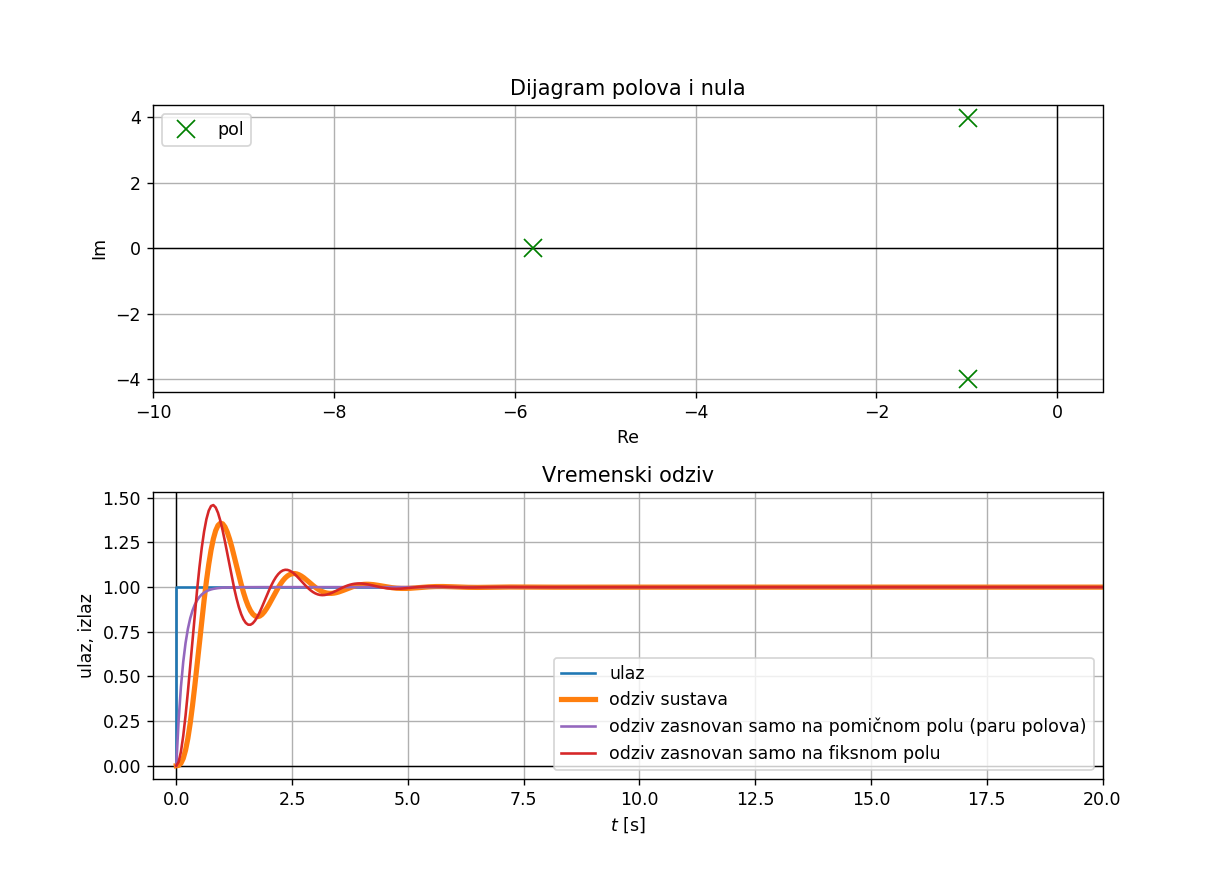

FloatSlider(value=0.1, continuous_update=False, description='$\\alpha$:', max=10.0, min=0.1)

Output()

In [4]:
display(typeSelect)
continuous_update=False

# set up plot 

fig, ax = plt.subplots(2,1,figsize=[9.8,7],num='Aproksimacija dominantnim polom')
plt.subplots_adjust(hspace=0.35)
ax[0].grid(True)
ax[1].grid(True)
# ax[2].grid(which='both', axis='both', color='lightgray')
ax[0].axhline(y=0,color='k',lw=.8)
ax[1].axhline(y=0,color='k',lw=.8)
ax[0].axvline(x=0,color='k',lw=.8)
ax[1].axvline(x=0,color='k',lw=.8)
ax[0].set_xlabel('Re')
ax[0].set_ylabel('Im')
ax[0].set_xlim([-10,0.5])
ax[1].set_xlim([-0.5,20])
ax[1].set_xlabel('$t$ [s]')
ax[1].set_ylabel('ulaz, izlaz')
ax[0].set_title('Dijagram polova i nula')
ax[1].set_title('Vremenski odziv')

plotzero, = ax[0].plot([], [])
response, = ax[1].plot([], [])
responseAdom, = ax[1].plot([], [])
responseBdom, = ax[1].plot([], [])

ax[1].step([0,50],[0,1],color='C0',label='ulaz')

# generate x values
  
def response_func(a,index):
    
    global plotzero, response, responseAdom, responseBdom 
#     global bodePlot, bodePlotAdom, bodePlotBdom

    t = np.linspace(0, 50, 1000)
    
    if index==0:
        b=1
        num=a*b
        den=([1,a+b,a*b])
        tf_sys=c.TransferFunction(num,den)
        poles_sys,zeros_sys=c.pzmap(tf_sys, Plot=False)
        tout, yout = c.step_response(tf_sys,t)
        den1=([1,a])
        tf_sys1=c.TransferFunction(a,den1)
        toutA, youtA = c.step_response(tf_sys1,t)
        den2=([1,b])
        tf_sys2=c.TransferFunction(b,den2)
        toutB, youtB = c.step_response(tf_sys2,t)
        mag, phase, omega = c.bode_plot(tf_sys, Plot=False)   # Bode-plot
        magA, phase, omegaA = c.bode_plot(tf_sys1, Plot=False)   # Bode-plot
        magB, phase, omegaB = c.bode_plot(tf_sys2, Plot=False)   # Bode-plot
        s=sym.Symbol('s')
        eq=(a*b/((s+a)*(s+b)))
        eq1=1/(((1/a)*s+1)*((1/b)*s+1))
        display(Markdown('Pomični pol (ljubičasta krivulja) $\\alpha$ je jednak %.1f, fiksni pol (crvena krivulja) $b$ je jednak %i; Prijenosna funkcija je:'%(a,1)))
        display(eq),display(Markdown('or')),display(eq1)

    elif index==1:
        omega0=4.1
        zeta=0.24
        num=a*omega0**2
        den=([1,2*zeta*omega0+a,omega0**2+2*zeta*omega0*a,a*omega0**2])
        tf_sys=c.TransferFunction(num,den)
        poles_sys,zeros_sys=c.pzmap(tf_sys, Plot=False)
        tout, yout = c.step_response(tf_sys,t)
        den1=([1,a])
        tf_sys1=c.TransferFunction(a,den1)
        toutA, youtA = c.step_response(tf_sys1,t)
        den2=([1,2*zeta*omega0,omega0**2])
        tf_sys2=c.TransferFunction(omega0**2,den2)
        toutB, youtB = c.step_response(tf_sys2,t)
        mag, phase, omega = c.bode_plot(tf_sys, Plot=False)   # Bode-plot
        magA, phase, omegaA = c.bode_plot(tf_sys1, Plot=False)   # Bode-plot
        magB, phase, omegaB = c.bode_plot(tf_sys2, Plot=False)   # Bode-plot
        s=sym.Symbol('s')
        eq=(a*omega0**2/((s+a)*(s**2+2*zeta*omega0*s+omega0*omega0)))
        eq1=1/(((1/a)*s+1)*((1/(omega0*omega0))*s*s+(2*zeta*a/omega0)*s+1))
        
        display(Markdown('Pomični pol (ljubičasta krivulja) $\\alpha$ je jednak %.1f, fiksni pol (crvena krivulja) $\\beta$ je jednak $1\pm4j$ ($\omega_0$ je postavljen na 4.1, $\zeta$ je postavljen na 0.24). Prijenosna funkcija je:'%(a)))
        display(eq),display(Markdown('ili')),display(eq1)
    
    ax[0].lines.remove(plotzero)
    ax[1].lines.remove(response)
    ax[1].lines.remove(responseAdom)
    ax[1].lines.remove(responseBdom)
    
    plotzero, = ax[0].plot(np.real(poles_sys), np.imag(poles_sys), 'xg', markersize=10, label = 'pol')
    response, = ax[1].plot(tout,yout,color='C1',label='odziv sustava',lw=3)
    responseAdom, = ax[1].plot(toutA,youtA,color='C4',label='odziv zasnovan samo na pomičnom polu (paru polova)')
    responseBdom, = ax[1].plot(toutB,youtB,color='C3',label='odziv zasnovan samo na fiksnom polu')

    ax[0].legend()
    ax[1].legend()
    
a_slider=widgets.FloatSlider(value=0.1, min=0.1, max=10, step=.1,
                                        description='$\\alpha$:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)

input_data=widgets.interactive_output(response_func,{'a':a_slider,'index':typeSelect})

def update_slider(index):
    global a_slider
    
    aval=[0.1,0.1]
    a_slider.value=aval[index]    

input_data2=widgets.interactive_output(update_slider,{'index':typeSelect})

display(a_slider,input_data)
